    Jacob Knopping
    2/27/2020
    
    26.6 Assignment: Gaussian Mixture Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

#New for GMM
from sklearn.mixture import GaussianMixture

from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [4]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

__1) Apply GMM to the heart disease data by setting n_components=2. Get ARI and silhoutte scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the assignments of the previous checkpoints. Which algorithm does perform better?__

In [5]:
# Define clustering with GMM
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

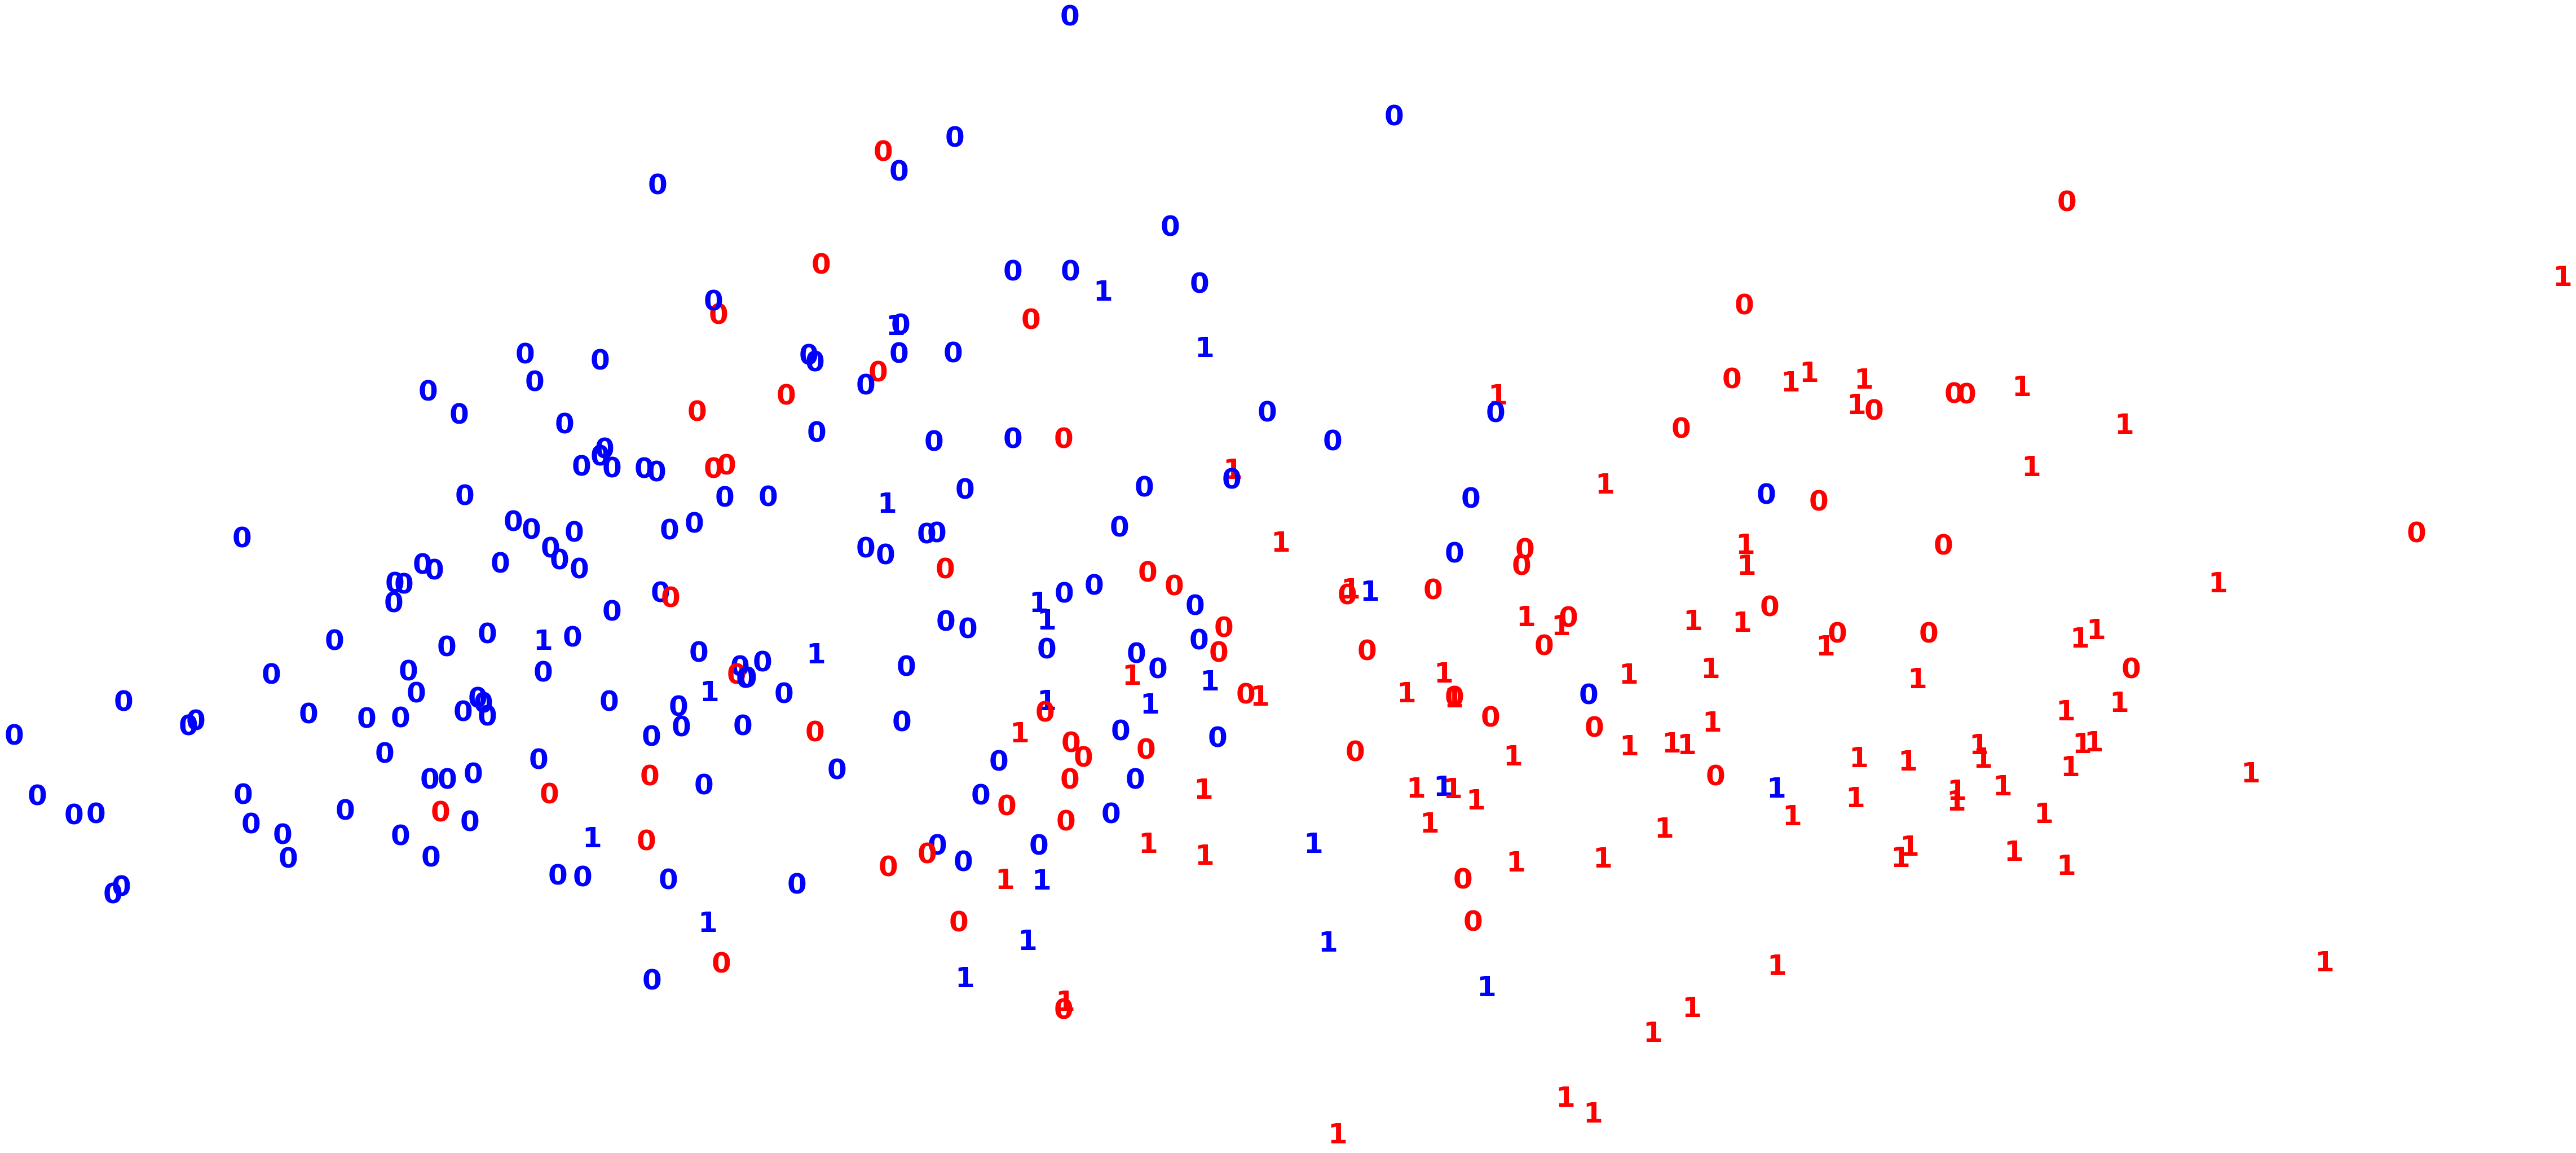

In [6]:
# Apply pca to visualize results

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [7]:
# ARI and silhouette scores

print("Adjusted Rand Index of the GMM solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM solution: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhouette score of the GMM solution: 0.13628813153331445


ARI and silhouette scores for GMM are both less than k-means and hierarchical clustering scores. K-means had scores of ARI = .44, and silhouette coeff. = .17. The best performing hierarchical model (average linkage, cosine distance)  had scores of ARI = .29, and silhouette coeff. = .15.

The k-means model still remains the best performer.

__2) GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. Specifically, there are four types you can specify:__
* __full: This is the default. Each component has its own general covariance matrix.__
* __tied: All components share the same general covariance matrix.__
* __diag: Each component has its own diagonal covariance matrix.__
* __spherical: Each component has its own single variance.__

__Try all of these. Which one does perform better in terms of ARI and silhouette scores?__

In [8]:
# FULL (DEFAULT), same as before

# Define clustering with GMM
gmm_cluster = GaussianMixture(n_components=2,
                              covariance_type='full',
                              random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

# ARI and silhouette scores
print("Adjusted Rand Index of the GMM solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM solution: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhouette score of the GMM solution: 0.13628813153331445


In [9]:
# TIED

# Define clustering with GMM
gmm_cluster = GaussianMixture(n_components=2,
                              covariance_type='tied',
                              random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

# ARI and silhouette scores
print("Adjusted Rand Index of the GMM solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM solution: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhouette score of the GMM solution: 0.13628813153331445


In [10]:
# DIAG

# Define clustering with GMM
gmm_cluster = GaussianMixture(n_components=2,
                              covariance_type='diag',
                              random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

# ARI and silhouette scores
print("Adjusted Rand Index of the GMM solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM solution: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhouette score of the GMM solution: 0.13628813153331445


In [11]:
# SPHERICAL

# Define clustering with GMM
gmm_cluster = GaussianMixture(n_components=2,
                              covariance_type='spherical',
                              random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

# ARI and silhouette scores
print("Adjusted Rand Index of the GMM solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM solution: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.20765243525722465
The silhouette score of the GMM solution: 0.12468753110276873


The ARI and silhouette scores are the same across all covariance types, expcept for the spherical covariance type. For the spherical covariance type, the ARI was a little higher (.21 > .18) and the silhouette score was a little lower (.12 < .14).